# Code for Figure 3

# Load simulation data

In [1]:
%%time
%load_ext autoreload

from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "/Users/Akshay/Documents/tRNAShuffle/data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))
    
#Experimentally obtained codon usage frequencies and tRNA abundances at growth rate = 2.5 dbl/hr
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 8.6 s, sys: 2.71 s, total: 11.3 s
Wall time: 8.68 s


In [2]:
print(min(gr25_ptRNA),max(gr25_ptRNA))

0.0015220700152021665 0.08523592085132133


244.59523220868448
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
[192.0348289110412]
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272

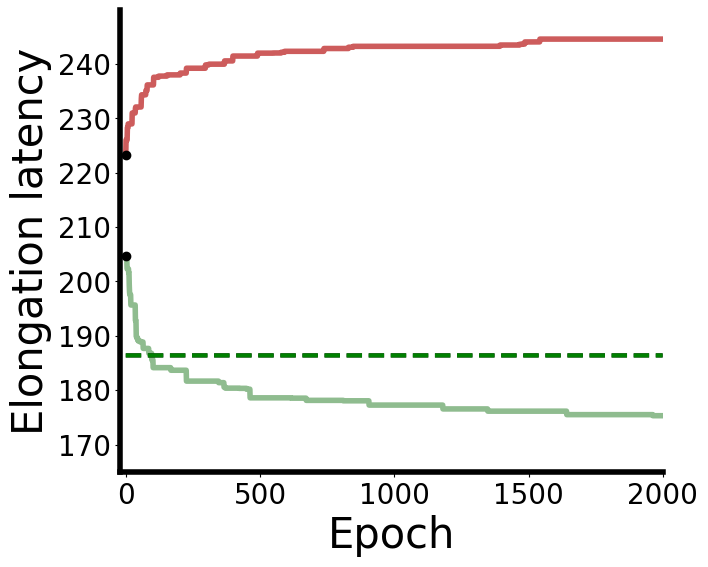

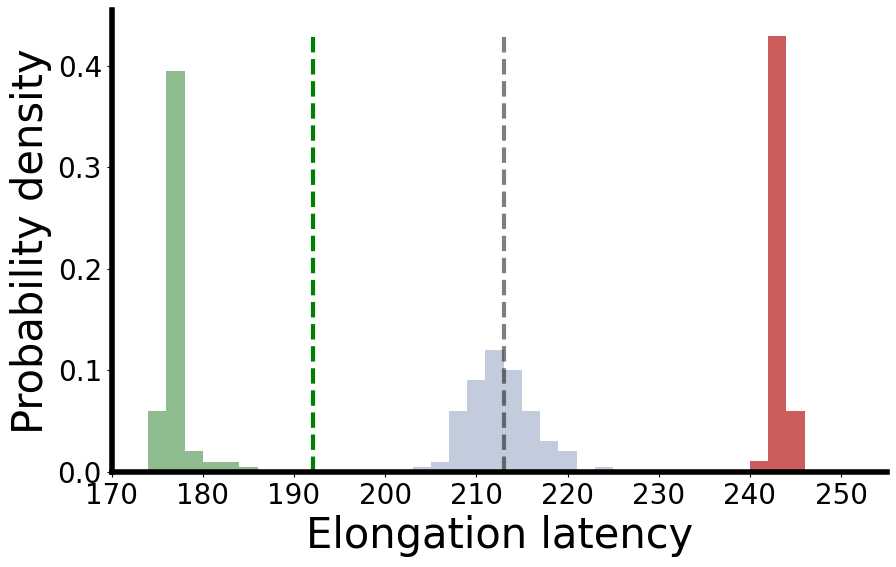

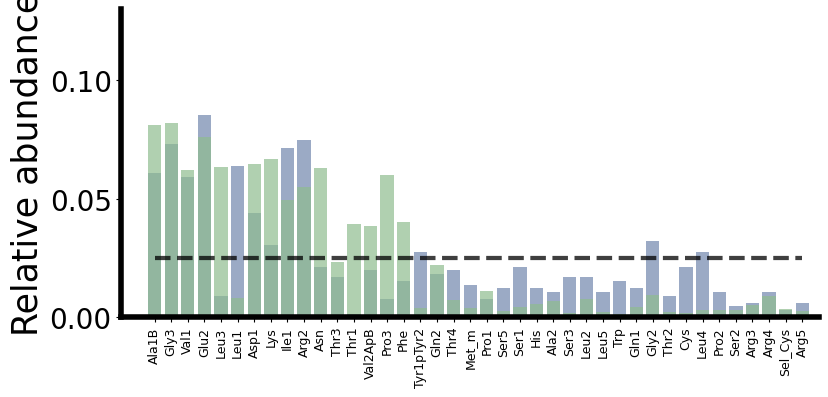

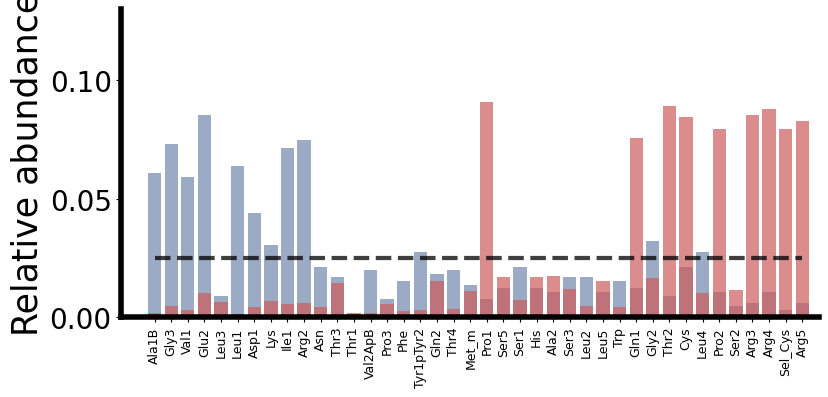

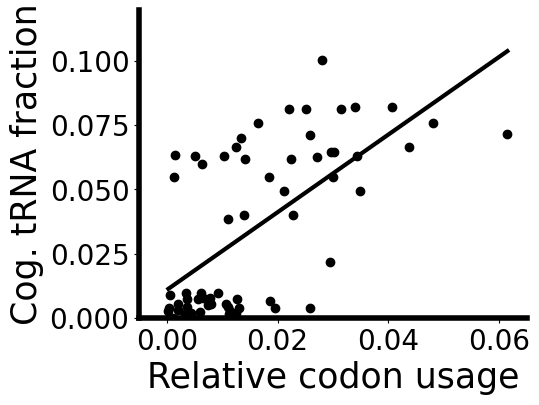

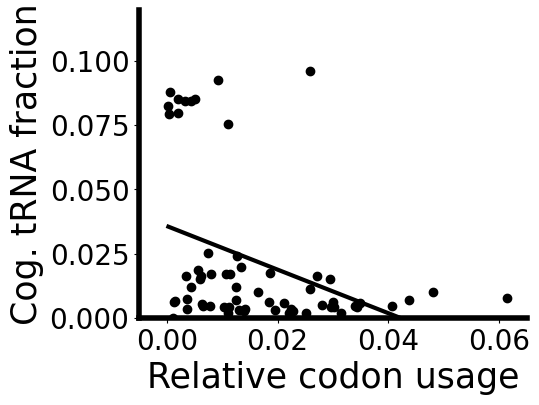

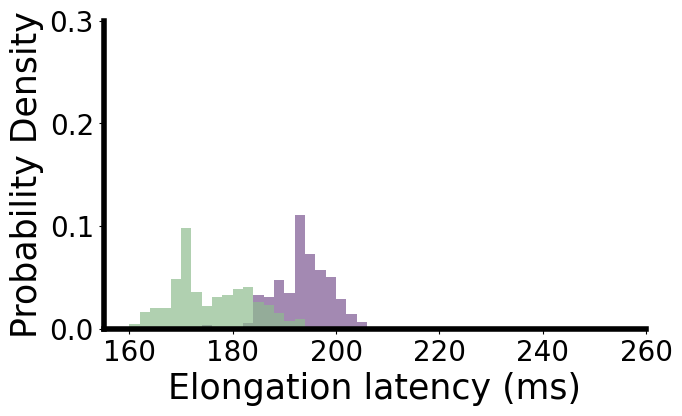

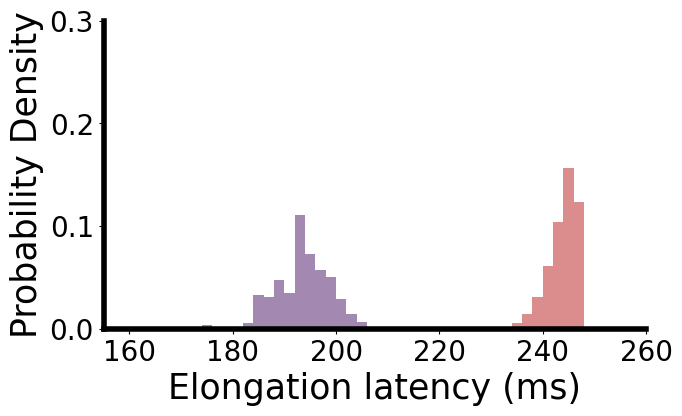

In [42]:
import matplotlib.pyplot as plt
import numpy as np

####Plot GA trajectory for both fast and slow
fullelongt = np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_fullelongt.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='darkseagreen')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='black',linestyle='dashed')
ax.set_xlim(-20,len(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

fullelongt = np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_slowtRNA_fullelongt.npy')
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='indianred')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='green',linestyle='dashed')
print(max(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency',fontsize=30)
ax.set_xlabel('Epoch',fontsize=30)
ax.set_ylim(165,250)
ax.set_yticks(np.arange(170,250,10))

####Plot final populations for fast and slow
fig,ax = plt.subplots(figsize=(10,6))

elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_elongt.npy')
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_ptRNA.npy')
histfast=ax.hist(elongt_list_fast,15,range=(164,194),color='darkseagreen',density=True)

elongt_list_slow =np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_slowtRNA_elongt.npy')
ptRNA_list_slow=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_slowtRNA_ptRNA.npy')
histslow=ax.hist(elongt_list_slow,15,range=(240,270),color='indianred',density=True)

elongt_list = np.load('./data/UniformRandomtRNA_WTCodonUsage_100sample_elongt.npy')
hist=ax.hist(elongt_list,15,range = (195,225),color='#39568CFF',density=True,alpha=0.3)


##Compute random distribution mean & WT and plot
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map,gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
pCodon_WT = np.array(pCodon_transcriptome)

elongt_WTtRNA_WTcodon, std = computeElongationLatency(gr25_ptRNA,pCodon_WT,ensmbl_latency_dict)
print(elongt_WTtRNA_WTcodon)
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
elongt_uniformtRNA_WTcodon, std = computeElongationLatency(ptRNA_uniform,gr25_pCodon,ensmbl_latency_dict)

ax.plot([elongt_uniformtRNA_WTcodon]*100,np.linspace(0,max(histslow[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([elongt_WTtRNA_WTcodon]*100,np.linspace(0,max(histslow[0]),100),linewidth=3,color='green',linestyle='dashed')

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency',fontsize=30)
    ax.set_xlim(170,255)
    ax.set_xticks(np.arange(170,260,10))
    ax.set_ylim(0,0.455)
    
    
### Plot tRNA distributions#######
#Wildtype
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

#Compute cognate distributions and sort codons by frequency
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)

ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

#Resort ptRNA_min and plot
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,4))
ax.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_min_sorted,color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

#Resort ptRNA_max and plot
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
ptRNA_max_dict = dict(zip(tRNA_tags,ptRNA_max))
ptRNA_max_sorted=[ptRNA_max_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax1 = plt.subplots(figsize=(9,4))
ax1.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax1.bar(np.arange(40),ptRNA_max_sorted,color='indianred',width=0.8,alpha=0.7)
ax1.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax1.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
for ax in [ax,ax1]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlim(-2,40)
    ax.set_ylabel('Relative abundance',fontsize=25)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.13)
    
    
####Plot tRNA frequency vs. codon frequency######
fig,ax3 = plt.subplots(figsize=(5,4))
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_min_sorted_percodon = [sum([ptRNA_min_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
ax3.scatter(pCodon_sorted,ptRNA_min_sorted_percodon,color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_min_sorted_percodon,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax3.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_min_sorted_percodon,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_min_sorted_percodon,1)
print("slope: ", slope)

fig,ax4 = plt.subplots(figsize=(5,4))
tRNA_sorted = [codon_dict[codon] for codon in codon_sorted]
ptRNA_max_sorted_percodon = [sum([ptRNA_max_dict[key] for key in tRNAs]) for tRNAs in tRNA_sorted]
ax4.scatter(pCodon_sorted,ptRNA_max_sorted_percodon,color='black',label = 'Protein-coding codon')

y_model,SS_err,_,_,_ = np.polyfit(pCodon_sorted,ptRNA_max_sorted_percodon,1,full=True)
y_hat = np.polyval(y_model,pCodon_sorted)
x_sweep_i = np.linspace(min(pCodon_sorted),max(pCodon_sorted),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax4.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2: ",calc_R2(pCodon_sorted,ptRNA_max_sorted_percodon,y_hat))

slope, intercept = np.polyfit(pCodon_sorted,ptRNA_max_sorted_percodon,1)
print("slope: ", slope)

for ax in [ax3,ax4]:
    ax.set_xlim(-0.005,0.065)
    ax.set_ylim(0,0.12)
    ax.set_xlabel('Relative codon usage',fontsize=25)
    ax.set_ylabel('Cog. tRNA fraction',fontsize=25)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)

#Plot the elongation latency of each gene for WT distribution as well as fast & slow distributions
fig,ax = plt.subplots(figsize=(7,4))
fig,ax1 = plt.subplots(figsize=(7,4))

hist=ax.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(160,220),density=True,alpha=0.5)
hist=ax1.hist(transcriptome_elongt,color='#481567FF',bins=30,range=(160,220),density=True,alpha=0.5)
transcriptome_elongt_WT = transcriptome_elongt

codon_elongt = compute_codon_elongt(ptRNA_min, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
hist=ax.hist(transcriptome_elongt,color='darkseagreen',bins=30,range=(150,210),density=True,alpha=0.7)


print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))
print(hist)

print("GA FAST")
print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Mean of elongation latency distrib  ", np.mean(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

codon_elongt = compute_codon_elongt(ptRNA_max, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map, gene_latency)
hist=ax1.hist(transcriptome_elongt,color='indianred',bins=30,range=(220,280),density=True,alpha=0.7)

print(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT))
print(computeEffectiveGrowthRateShift(np.average(transcriptome_elongt)/np.average(transcriptome_elongt_WT)))
print(hist)

for ax in [ax,ax1]:
    ax.set_xlim(155,260)
    ax.set_ylim(0,0.3)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability Density',size=25)
    
print("GA SLOW")
print("Min. transcript elongation latency: ", min(transcriptome_elongt))
print("Max. transcript elongation latency: ", max(transcriptome_elongt))
print("Mean of elongation latency distrib:  ", np.mean(transcriptome_elongt))
print("Standard deviation of elongation latency distrib:  ", np.std(transcriptome_elongt))

/var/folders/wr/cby0172x24d_6b7kwlbjy44r0000gn/T/ipykernel_16404/2124898852.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


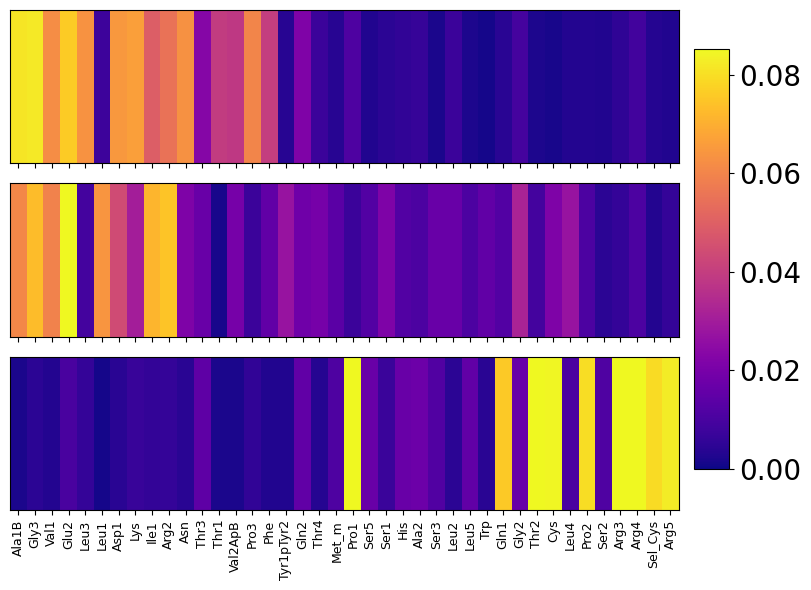

In [43]:
#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

#Resort ptRNA_min and plot
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]

fig, (ax,ax2,ax3) = plt.subplots(nrows=3, sharex=True,figsize=(7,6))

x = np.arange(0,40)
y = np.array(ptRNA_min_sorted)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.0852)
ax.set_yticks([])
ax.set_xlim(extent[0], extent[1])
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax.tick_params(axis='x', which='major', labelsize=9)

#Wild type
x = np.arange(0,40)
y = ptRNA_sorted
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
ax2.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.0852)
ax2.set_yticks([])
ax2.set_xlim(extent[0], extent[1])

#Resort ptRNA_max and plot
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
ptRNA_max_dict = dict(zip(tRNA_tags,ptRNA_max))
ptRNA_max_sorted=[ptRNA_max_dict[tRNA] for tRNA in tRNA_sorted]

x = np.arange(0,40)
y = np.array(ptRNA_max_sorted)
extent = [x[0]-(x[1]-x[0])/2., x[-1]+(x[1]-x[0])/2.,0,1]
heatmap = ax3.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto", extent=extent,vmin=0,vmax=0.0852)
ax3.set_yticks([])
ax3.set_xlim(extent[0], extent[1])
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax3.tick_params(axis='x', which='major', labelsize=9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.0, 0.21, 0.05, 0.7])
cbar = fig.colorbar(heatmap, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20)

plt.tight_layout()
plt.show()


# Perturbation analysis

## Original GA-discovered distribution

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133
[0.08123126194614116, 0.08212342743873052, 0.06195066441529554, 0.07604461446545532, 0.06350475084318546, 0.007913772176334247, 0.06471351776549156, 0.06655037765235057, 0.04952850970474256, 0.05497887400245486, 0.06307145063537409, 0.02317693012385308, 0.03933746737121183, 0.03854534429979515, 0.06005172928076274, 0.04017355604670932, 0.0039223168867047005, 0.021893414067457383, 0.007387337329405662, 0.0038714046481972755, 0.011045

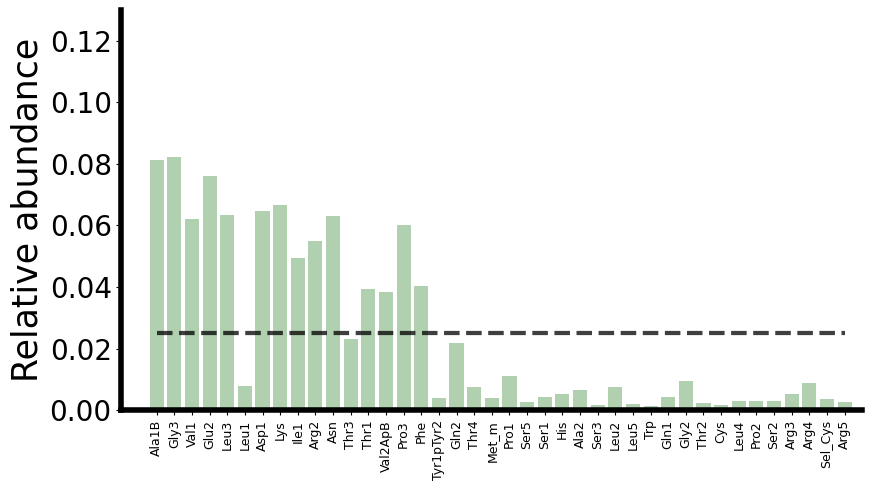

In [2]:
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

#Load elongation rate per codon
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map,gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
pCodon_WT = np.array(pCodon_transcriptome)

ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

#Resort ptRNA_min and plot
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_ptRNA.npy')
elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_elongt.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,5))
#ax.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_min_sorted,color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('Relative abundance',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=9)
ax.set_ylim(0,0.13)

plt.tight_layout()
print(ptRNA_min_sorted)

### Monotonicity single perturbation analysis
Takes in the original fastest performing tRNA distribution, then goes in codon-abundance weighted tRNA rank order starting from the second most-weighted tRNA doing the following:
1. If the given tRNA has more relative abundance than the immediately previous higher rank order bar (e.g., first tRNA if we're currently evaluating the second tRNA), then set the relative abundance to be 10% lower than the previous bar and add the removed relative abundance to the previous bar. [If check prior: if 10% higher on the previous bar is above 0.0852, set the bar to be 0.0852 and the current bar to be reduced by the delta increase] 
2. Evaluate the updated elongation latency and plot
3. Reset to the original fastest distribution and go to the next tRNA


In [3]:
def perturb(ptRNA,tRNA,tRNA_sorted, pCodon,ensmbl_latency_dict,pos,delta):
    ptRNA_maxval = max(gr25_ptRNA)
    ptRNA_minval = min(gr25_ptRNA)
    ptRNA_dict = dict(zip(tRNA, ptRNA))
    tRNA_1 = tRNA_sorted[pos]
    tRNA_0 = tRNA_sorted[pos-1]
    
    if pos==0:
        raise ValueError("pos cannot be zero")
        print("error")
        
    if  0.524*(ptRNA_dict[tRNA_0]+ptRNA_dict[tRNA_1]) > ptRNA_maxval:
        ptRNA_dict[tRNA_1] = ptRNA_dict[tRNA_1] - (ptRNA_maxval-ptRNA_dict[tRNA_0])
        ptRNA_dict[tRNA_0] = ptRNA_maxval
        
    elif 0.476*(ptRNA_dict[tRNA_0]+ptRNA_dict[tRNA_1]) < ptRNA_minval:
        ptRNA_dict[tRNA_0] = ptRNA_dict[tRNA_0] + (ptRNA_dict[tRNA_1]-ptRNA_minval)
        ptRNA_dict[tRNA_1] = ptRNA_minval
        
    else: 
        tot = (ptRNA_dict[tRNA_0]+ptRNA_dict[tRNA_1])
        ptRNA_dict[tRNA_1] = 0.476*tot
        ptRNA_dict[tRNA_0] = 0.524*tot
    
    arr = []
    if sum(ptRNA_dict.values())>1.0000001:
        print("Total over 1.0: ", sum(ptRNA_dict.values()))
        
    for i in range(30):
        arr.append(computeElongationLatency(np.array(list(ptRNA_dict.values())), pCodon, ensmbl_latency_dict)[0][0])
    return np.average(arr), np.array(list(ptRNA_dict.values()))
def monotonicity(ptRNA):
    if (len(ptRNA)==40):
        return (sum(np.diff(ptRNA) <= 0)/40)*100
    else:
        raise ValueError("Length of ptRNA is not 40")
        print("Length of ptRNA is not 40")

[ 0.08689556  0.26295096  0.24785338  0.02696151  0.76354198  1.5583188
  0.08921941 -0.04805234 -0.08673114  0.02536391  0.57628991  0.21868437
 -0.01234128  0.06203691  0.09027947  0.39125288  0.28427957  0.32249799
 -0.03676188  0.15167683  0.10693633  0.05987428 -0.21556516 -0.08753916
  0.09184756  0.03692454  0.04370322  0.18462263  0.16555752  0.2707622
  0.08305178  0.18168592  0.07780469  0.00931714  0.0636152  -0.17526693
  0.07480534 -0.06004779  0.15912037]
[0.08123126194614116, 0.08212342743873052, 0.07230952613351345, 0.06568575274723741, 0.06350475084318546, 0.007913772176334247, 0.06471351776549156, 0.06655037765235057, 0.04952850970474256, 0.05497887400245486, 0.06307145063537409, 0.02317693012385308, 0.03933746737121183, 0.03854534429979515, 0.06005172928076274, 0.04017355604670932, 0.0039223168867047005, 0.021893414067457383, 0.007387337329405662, 0.0038714046481972755, 0.011045087840645522, 0.002764297871937112, 0.004337515618113656, 0.005359226372646854, 0.00664866

(0.0, 0.13)

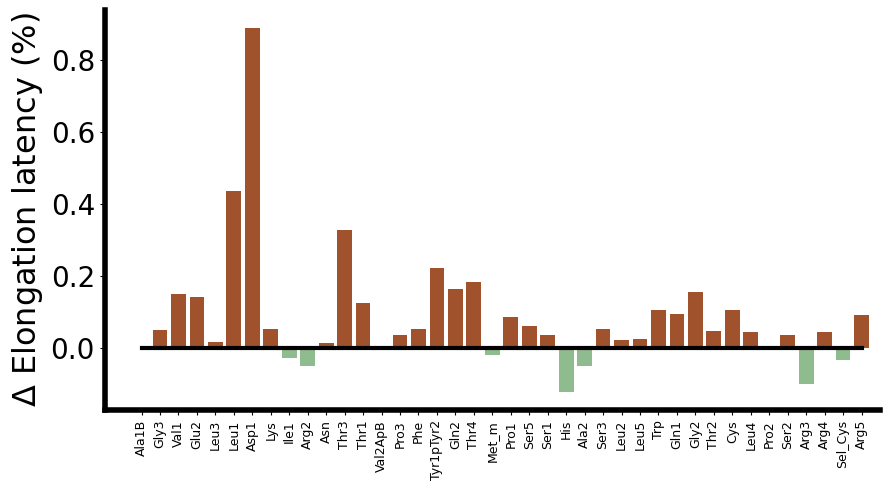

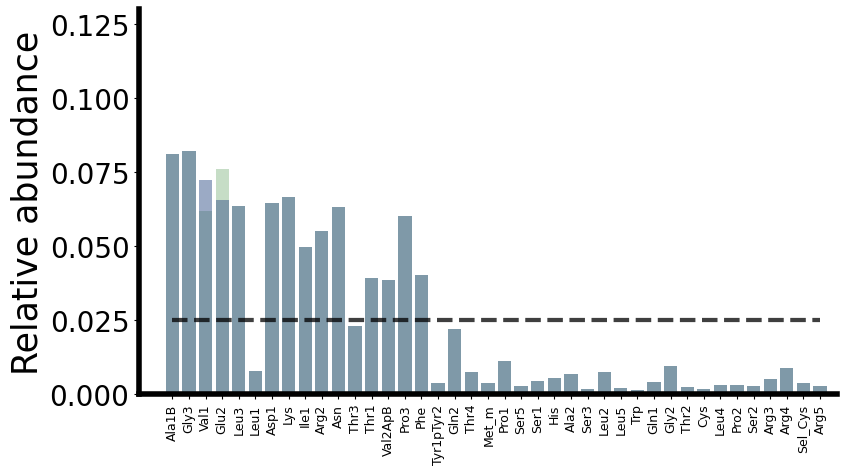

In [4]:
# Single perturbation analysis of each of the 40 tRNA
baseline = perturb(ptRNA_min, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,1,0)[0]
elongt_perturb = []
ptRNA_perturb = []
for i in range(1,len(tRNA_tags)):
    values = perturb(ptRNA_min, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,i,10)
    elongt_perturb.append(values[0])
    ptRNA_perturb.append(values[1])
print(elongt_perturb - baseline)

ptRNA_dict = dict(zip(tRNA_tags,ptRNA_perturb[2]))
ptRNA_sorted_perturb =[ptRNA_dict[tRNA] for tRNA in tRNA_sorted]
print(ptRNA_sorted_perturb)

#Plotting
fig,ax = plt.subplots(figsize=(9,5))
elongt_diff = (elongt_perturb - baseline)/baseline*100
elongt_diff[elongt_diff<0] = 0
elongt_diff=np.insert(elongt_diff,0,0)
print("show", elongt_diff)
ax.bar(np.arange(40),elongt_diff,color='sienna',width=0.8)

elongt_diff = (elongt_perturb - baseline)/baseline*100
elongt_diff[elongt_diff>0] = 0
elongt_diff=np.insert(elongt_diff,0,0)
ax.bar(np.arange(40),elongt_diff,color='darkseagreen',width=0.8)
ax.plot(np.arange(40),[0]*40,color='black',linewidth=3,alpha=1)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('$\Delta$ Elongation latency (%)',fontsize=23)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=9)
#ax.set_ylim(-5,5)
plt.tight_layout()

#Resort ptRNA_min and plot
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_ptRNA.npy')
elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_elongt.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,5))
#ax.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_min_sorted,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_sorted_perturb,color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('Relative abundance',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=9)
ax.set_ylim(0,0.13)

50.0
[-0.15059548  0.20004257  0.02453205  0.15083184  0.97623046  1.85345634
  1.50005245  1.4117724   1.48653525  1.48335891  1.70172296  1.57441985
  1.80402952  1.81007254  1.66535521  2.44033146  2.11188085  2.05579725
  2.53406811  2.20306811  2.5608924   2.24198116  2.49418362  2.39924832
  2.18002249  2.53061399  2.21257593  2.60654232  2.51695193  2.44584396
  2.39366394  2.40002224  2.55377059  2.48846338  2.51876311  2.66180506
  2.61500201  2.30717791  2.20295259]
[0.08523592085132133, 0.07339638286519524, 0.07478405622373152, 0.06887370020432539, 0.03693069791765803, 0.0514888955179228, 0.05938111215636296, 0.05421834847171387, 0.054616863849822145, 0.05904706732545136, 0.04025111543181386, 0.0397723638480584, 0.03912940560476846, 0.05009270321098946, 0.044895070096906665, 0.023425347414760836, 0.02262261434077383, 0.014639329186816909, 0.008996936728580221, 0.01007016791130244, 0.006241892010675008, 0.005243998780972859, 0.005304378039010033, 0.006008786407905145, 0.00379

(0.0, 0.13)

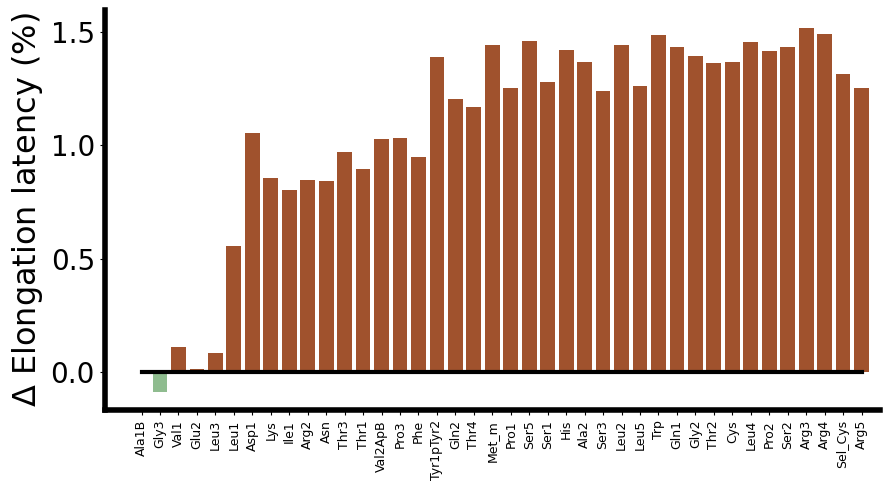

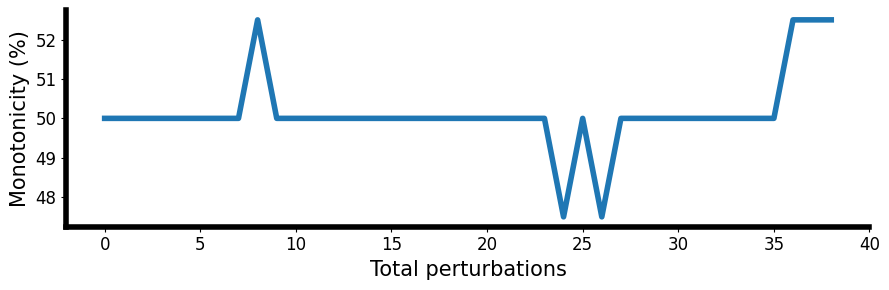

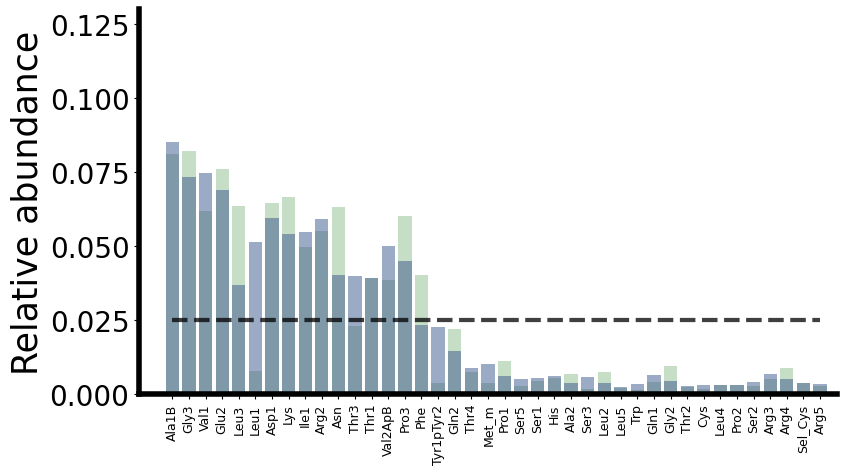

In [5]:
# Consecutive 40-tRNA perturbation analyses
baseline = perturb(ptRNA_min, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,1,0)[0]
print(monotonicity(ptRNA_min))
elongt_perturb = []
ptRNA_perturb = []
mono_perturb = []
ptRNA_min_update = ptRNA_min.copy()
#mono_perturb.append(monotonicity(ptRNA_min))
for i in range(1,len(tRNA_tags)):
    values = perturb(ptRNA_min_update, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,i,10)
    elongt_perturb.append(values[0])
    ptRNA_perturb.append(values[1])
    ptRNA_min_update = values[1]
    mono_perturb.append(monotonicity(ptRNA_min_update))
print(elongt_perturb - baseline)

ptRNA_dict = dict(zip(tRNA_tags,ptRNA_perturb[-1]))
ptRNA_sorted_perturb =[ptRNA_dict[tRNA] for tRNA in tRNA_sorted]
print(ptRNA_sorted_perturb)
print(mono_perturb)

#Plotting
#Delta elongation latency plot
fig,ax = plt.subplots(figsize=(9,5))
elongt_diff = (elongt_perturb - baseline)/baseline*100
elongt_diff[elongt_diff<0] = 0
elongt_diff=np.insert(elongt_diff,0,0)
print("show", elongt_diff)
ax.bar(np.arange(40),elongt_diff,color='sienna',width=0.8)

elongt_diff = (elongt_perturb - baseline)/baseline*100
elongt_diff[elongt_diff>0] = 0
elongt_diff=np.insert(elongt_diff,0,0)
ax.bar(np.arange(40),elongt_diff,color='darkseagreen',width=0.8)
ax.plot(np.arange(40),[0]*40,color='black',linewidth=3,alpha=1)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('$\Delta$ Elongation latency (%)',fontsize=23)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=9)
#ax.set_ylim(-5,5)
plt.tight_layout()

#Monotonicity plot
fig,ax = plt.subplots(figsize=(9,3))
ax.plot(np.arange(39),mono_perturb,linewidth=4)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)

ax.set_ylabel('Monotonicity (%)',fontsize=15)
ax.set_xlabel('Total perturbations',fontsize=15)

ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
#ax.set_ylim(-5,5)
plt.tight_layout()

#Resort ptRNA_min and plot
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_ptRNA.npy')
elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_elongt.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,5))
ax.bar(np.arange(40),ptRNA_min_sorted,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_sorted_perturb,color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('Relative abundance',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=9)
ax.set_ylim(0,0.13)

In [6]:
# Monotonicity algorithm: multiple rounds of consecutive 40-tRNA perturbation analyses,
#shifting abundance mass towards monotonicity.
# Can also have a second version of this figure that doesn't touch copies of tRNA (e.g., Leu1, Leu3)
baseline = perturb(ptRNA_min, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,1,0)
baseline_elongt = baseline[0]
baseline_ptRNA = baseline[1]

elongt_perturb = []
ptRNA_perturb = []

ptRNA_min_update = ptRNA_min.copy()
mono_perturb = []
count=0

ptRNA_sorted_perturb_iter = baseline_ptRNA.copy()
print(ptRNA_min_update)

while (np.diff(ptRNA_sorted_perturb_iter) > 0).any():
    count+=1
    for i in range(1,len(tRNA_tags)):
        values = perturb(ptRNA_min_update, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,i,10)
        ptRNA_min_update = values[1]
    elongt_perturb.append(values[0])
    ptRNA_dict = dict(zip(tRNA_tags,values[1]))
    ptRNA_sorted_perturb_iter =[ptRNA_dict[tRNA] for tRNA in tRNA_sorted]
    mono_perturb.append(monotonicity(ptRNA_sorted_perturb_iter))
    ptRNA_perturb.append(ptRNA_sorted_perturb_iter)
    print("iter: ", count, " monotonicity: ", monotonicity(ptRNA_sorted_perturb_iter), "elongt: ",elongt_perturb[-1] )
    print(ptRNA_sorted_perturb_iter)

print(elongt_perturb)
print(elongt_perturb - baseline_elongt)

[0.08123126 0.00664867 0.05497887 0.00527413 0.00889936 0.00278006
 0.06307145 0.06471352 0.00160629 0.00416173 0.02189341 0.07604461
 0.00946227 0.08212343 0.00535923 0.04952851 0.00791377 0.00764032
 0.06350475 0.00307751 0.00206736 0.06655038 0.0038714  0.04017356
 0.01104509 0.00305555 0.06005173 0.00364651 0.00433752 0.00289446
 0.00178251 0.0027643  0.03933747 0.002267   0.02317693 0.00738734
 0.00125942 0.00392232 0.06195066 0.03854534]
iter:  1  monotonicity:  57.49999999999999 elongt:  178.06659780553943
[0.08523592085132133, 0.07339638286519524, 0.07478405622373152, 0.06887370020432539, 0.03693069791765803, 0.0514888955179228, 0.05938111215636296, 0.05421834847171387, 0.054616863849822145, 0.05904706732545136, 0.04025111543181386, 0.0397723638480584, 0.03912940560476846, 0.05009270321098946, 0.044895070096906665, 0.023425347414760836, 0.02262261434077383, 0.014639329186816909, 0.008996936728580221, 0.01007016791130244, 0.006241892010675008, 0.005243998780972859, 0.00530437803

iter:  10  monotonicity:  95.0 elongt:  178.86958673125847
[0.08429464135096705, 0.07747880641104032, 0.07176110481709913, 0.06692503381976654, 0.06277357100550202, 0.05918620150521412, 0.0560457173010481, 0.05318115056202265, 0.05037268899883144, 0.04739844203067555, 0.04410449229152998, 0.040443850003223016, 0.03647383785328907, 0.032328412055652116, 0.028182670860167208, 0.024209726063111704, 0.020553506535547963, 0.01731065245728872, 0.014520950820531547, 0.012176165359305931, 0.01024845651577339, 0.008703764153689468, 0.007497418943857629, 0.006571851373570149, 0.005863442326610592, 0.005312892660492146, 0.004876474971872371, 0.004536962210473569, 0.004295950099797332, 0.0041536232030106686, 0.004095081103978876, 0.004090627110039584, 0.004104488146914402, 0.004103856630126918, 0.00406411828052091, 0.003970261486094224, 0.003816135579513693, 0.0036029837974774635, 0.003337874395491216, 0.0030321149088813333]
iter:  11  monotonicity:  97.5 elongt:  179.077313536076
[0.0847692866272

(0.0, 0.13)

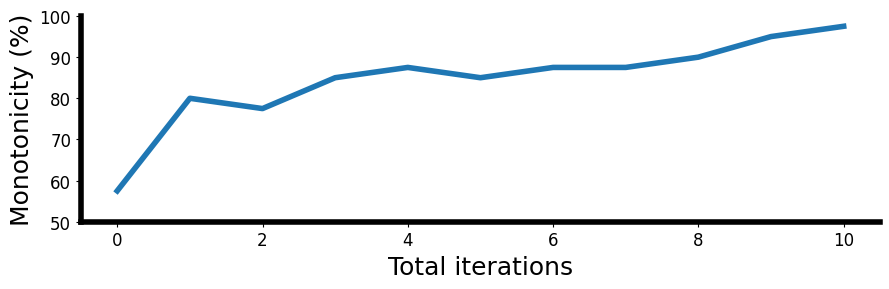

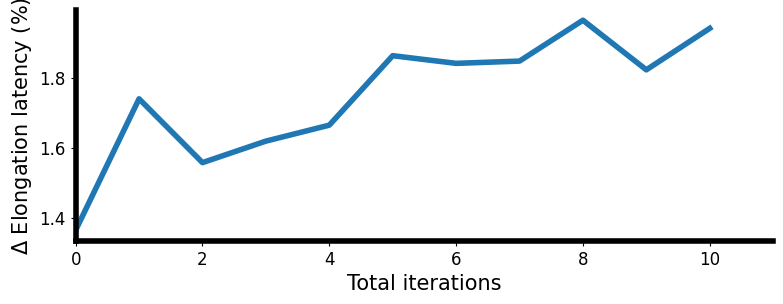

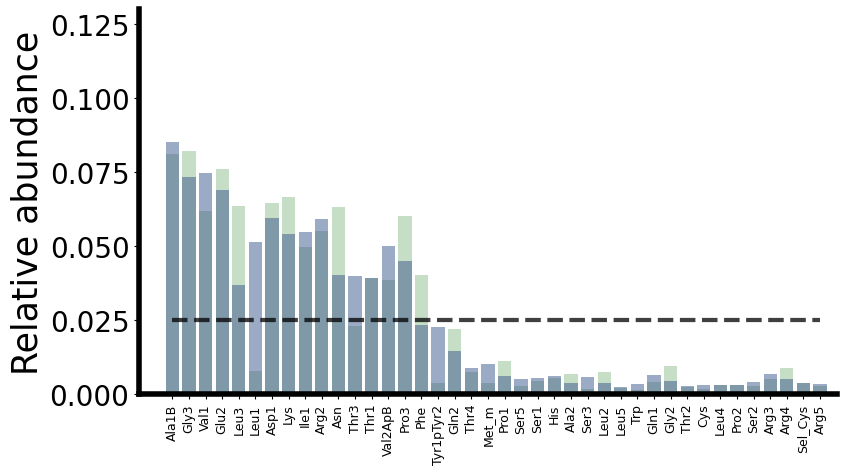

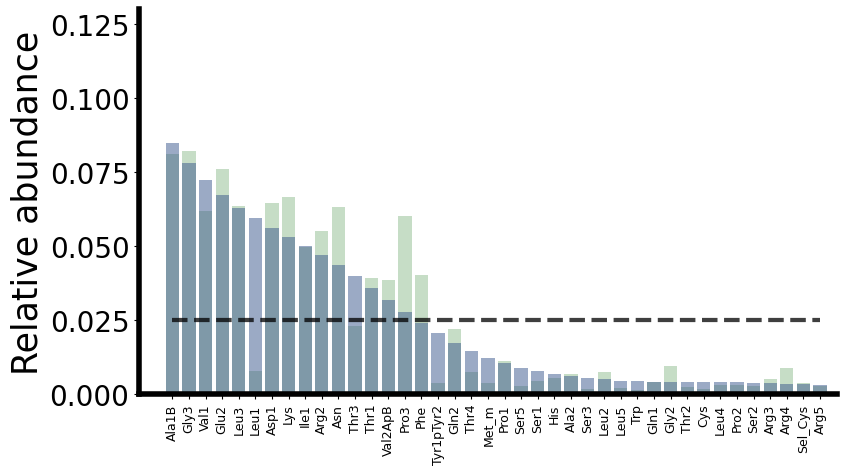

In [12]:
#Monotonicity plot
fig,ax = plt.subplots(figsize=(9,3))

ax.plot(np.arange(len(mono_perturb)),mono_perturb,linewidth=4)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

ax.set_ylabel('Monotonicity (%)',fontsize=18)
ax.set_xlabel('Total iterations',fontsize=18)

ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.set_ylim(50,100)
plt.tight_layout()

#Elongation latency % plot
fig,ax = plt.subplots(figsize=(9,3))
ax.plot(np.arange(len(elongt_perturb)),(elongt_perturb-baseline_elongt)/baseline_elongt*100,linewidth=4)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(0,len(elongt_perturb))

ax.set_ylabel('$\Delta$ Elongation latency (%)',fontsize=15)
ax.set_xlabel('Total iterations',fontsize=15)

ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)


#Resort ptRNA_min and plot - plot iter 0
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_ptRNA.npy')
elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_elongt.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,5))
ax.bar(np.arange(40),ptRNA_min_sorted,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_perturb[0],color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('Relative abundance',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=9)
ax.set_ylim(0,0.13)

#Resort ptRNA_min and plot - plot final iter
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_ptRNA.npy')
elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_elongt.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,5))
ax.bar(np.arange(40),ptRNA_min_sorted,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_perturb[-1],color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
ax.plot(np.arange(40),[1/40]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('Relative abundance',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=9)
ax.set_ylim(0,0.13)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
#Compute elongation latency given a tRNA distribution
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]

elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_elongt.npy')
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_2ksample_fasttRNA_ptRNA.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
print(ptRNA_min_dict)
arr = []
for i in range(20):
    arr.append(computeElongationLatency(np.array(list(ptRNA_min_dict.values())), pCodon_WT, ensmbl_latency_dict)[0][0])
print(np.average(arr))


ptRNA_min_dict['Gly3'] = ptRNA_min_dict['Gly3'] - (0.0852-ptRNA_min_dict['Ala1B'])
ptRNA_min_dict['Ala1B'] = 0.0852
print(ptRNA_min_dict)
arr = []
for i in range(20):
    arr.append(computeElongationLatency(np.array(list(ptRNA_min_dict.values())), pCodon_WT, ensmbl_latency_dict)[0][0])
print(np.average(arr))

{'Ala1B': 0.08123126194614116, 'Ala2': 0.006648668819344215, 'Arg2': 0.05497887400245486, 'Arg3': 0.005274133076972049, 'Arg4': 0.00889935579307245, 'Arg5': 0.0027800564123691136, 'Asn': 0.06307145063537409, 'Asp1': 0.06471351776549156, 'Cys': 0.001606285316202268, 'Gln1': 0.0041617335977883856, 'Gln2': 0.021893414067457383, 'Glu2': 0.07604461446545532, 'Gly2': 0.009462273088121562, 'Gly3': 0.08212342743873052, 'His': 0.005359226372646854, 'Ile1': 0.04952850970474256, 'Leu1': 0.007913772176334247, 'Leu2': 0.007640317432789824, 'Leu3': 0.06350475084318546, 'Leu4': 0.0030775127394212336, 'Leu5': 0.002067357564407544, 'Lys': 0.06655037765235057, 'Met_m': 0.0038714046481972755, 'Phe': 0.04017355604670932, 'Pro1': 0.011045087840645522, 'Pro2': 0.0030555522266254524, 'Pro3': 0.06005172928076274, 'Sel_Cys': 0.0036465102799836885, 'Ser1': 0.004337515618113656, 'Ser2': 0.0028944619288431535, 'Ser3': 0.0017825140832901875, 'Ser5': 0.002764297871937112, 'Thr1': 0.03933746737121183, 'Thr2': 0.0022

In [17]:
ptRNA_min_dict['Ala1B']
for i in range(10):
    arr.append(computeElongationLatency(ptRNA_min, pCodon_WT, ensmbl_latency_dict)[0][0])
print(np.average(arr))

175.5490985083242


In [8]:
codon_elongt = compute_codon_elongt(ptRNA_min, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
np.mean(transcriptome_elongt)

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133


175.12850719233106

# Extra analysis

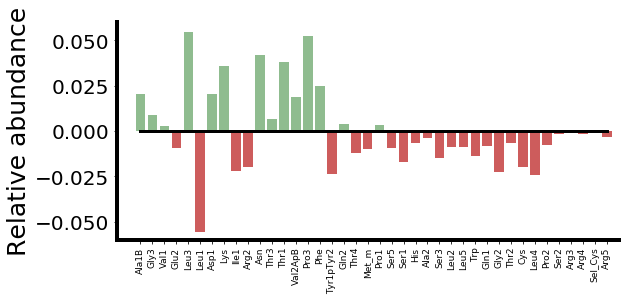

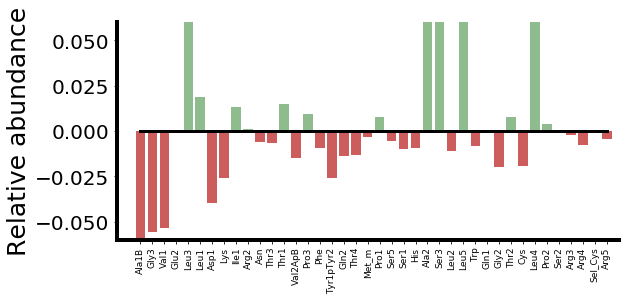

In [32]:
### Plot tRNA distributions#######
#Wildtype
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

#Resort ptRNA_min and plot
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]

fig,ax = plt.subplots(figsize=(9,4))
tRNA_diff = ptRNA_min_sorted-ptRNA_sorted
tRNA_diff[tRNA_diff<0] = 0
ax.bar(np.arange(40),tRNA_diff,color='darkseagreen',width=0.8)
tRNA_diff = ptRNA_min_sorted-ptRNA_sorted
tRNA_diff[tRNA_diff>0] = 0
ax.bar(np.arange(40),tRNA_diff,color='indianred',width=0.8)
ax.plot(np.arange(40),[0]*40,color='black',linewidth=3,alpha=1)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

#Resort ptRNA_max and plot
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
ptRNA_max_dict = dict(zip(tRNA_tags,ptRNA_max))
ptRNA_max_sorted=[ptRNA_max_dict[tRNA] for tRNA in tRNA_sorted]

fig,ax1 = plt.subplots(figsize=(9,4))
tRNA_diff = ptRNA_max-ptRNA_sorted
tRNA_diff[tRNA_diff<0] = 0
ax1.bar(np.arange(40),tRNA_diff,color='darkseagreen',width=0.8)
tRNA_diff = ptRNA_max-ptRNA_sorted
tRNA_diff[tRNA_diff>0] = 0
ax1.bar(np.arange(40),tRNA_diff,color='indianred',width=0.8)
ax1.plot(np.arange(40),[0]*40,color='black',linewidth=3,alpha=1)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

for ax in [ax,ax1]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlim(-2,40)
    ax.set_ylabel('Relative abundance',fontsize=25)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(-0.06,0.06)

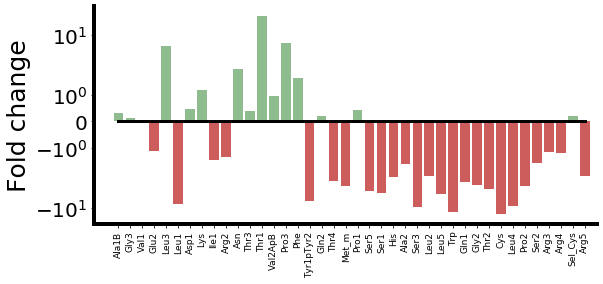

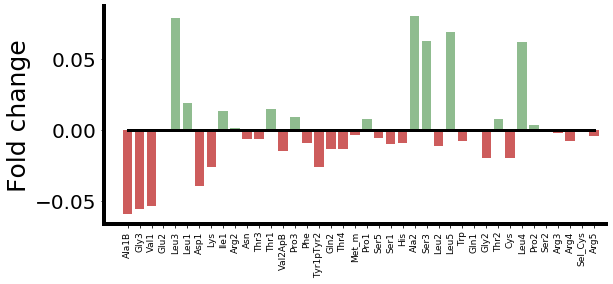

In [87]:
### Plot tRNA distributions#######
#Wildtype
from matplotlib import ticker

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']


#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

#Resort ptRNA_min and plot
ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]

fig,ax = plt.subplots(figsize=(9,4))
tRNA_diff = (ptRNA_min_sorted/ptRNA_sorted) #fold change
tRNA_diff_new = list()
for tRNA in tRNA_diff:
    if tRNA>1:
        tRNA_diff_new.append(tRNA-1)
    else:
        tRNA_diff_new.append(0)
ax.bar(np.arange(40),tRNA_diff_new,color='darkseagreen',width=0.8)

tRNA_diff = (ptRNA_min_sorted/ptRNA_sorted) #fold change
tRNA_diff_new = list()
for tRNA in tRNA_diff:
    if tRNA>1:
        tRNA_diff_new.append(0)
    else:
        tRNA_diff_new.append(-1*1/tRNA)
ax.bar(np.arange(40),tRNA_diff_new,color='indianred',width=0.8)
ax.plot(np.arange(40),[0]*40,color='black',linewidth=3,alpha=1)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')
ax.set_yscale('symlog')
#ax.yaxis.set_major_locator(ticker.MultipleLocator(10))  # major y tick positions every 100
#ax.yaxis.set_minor_locator(ticker.NullLocator())  # no minor ticks
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter())  # set regular formatting
ax.plot(np.arange(100),[10]*100,color='black',linestyle='dashed')
ax.plot(np.arange(100),[1]*100,color='black',linestyle='dashed')
ax.plot(np.arange(100),[-10]*100,color='black',linestyle='dashed')
ax.plot(np.arange(100),[-1]*100,color='black',linestyle='dashed')

#Resort ptRNA_max and plot
ptRNA_max = ptRNA_list_slow[np.argmax(elongt_list_slow)]
ptRNA_max_dict = dict(zip(tRNA_tags,ptRNA_max))
ptRNA_max_sorted=[ptRNA_max_dict[tRNA] for tRNA in tRNA_sorted]

fig,ax1 = plt.subplots(figsize=(9,4))
tRNA_diff = ptRNA_max-ptRNA_sorted
tRNA_diff[tRNA_diff<0] = 0
ax1.bar(np.arange(40),tRNA_diff,color='darkseagreen',width=0.8)
tRNA_diff = ptRNA_max-ptRNA_sorted
tRNA_diff[tRNA_diff>0] = 0
ax1.bar(np.arange(40),tRNA_diff,color='indianred',width=0.8)
ax1.plot(np.arange(40),[0]*40,color='black',linewidth=3,alpha=1)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

for ax in [ax,ax1]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlim(-2,40)
    ax.set_ylabel('Fold change',fontsize=25)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    #ax.set_ylim(-0.06,0.06)

# Extra: Codon GA

216.5679185709686
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  272
Sequences not available for # genes in Ecocyc DB:  153
Inconsistency in codons:  0
3767
Missing genes in transcriptome_dict in compute_transcript_distributions:  133


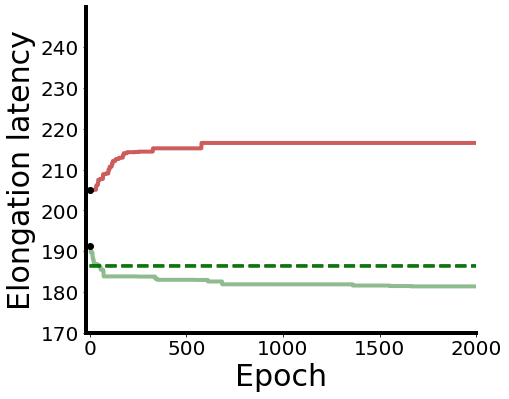

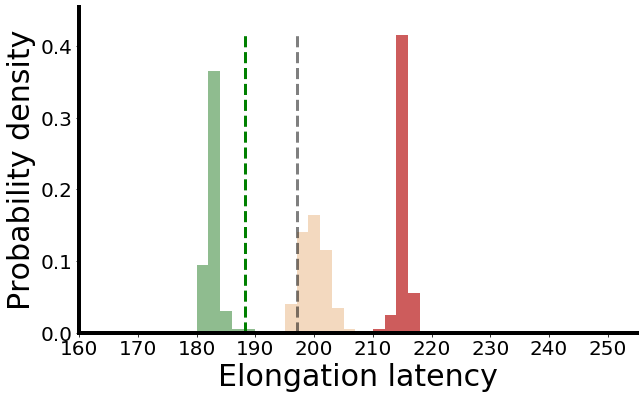

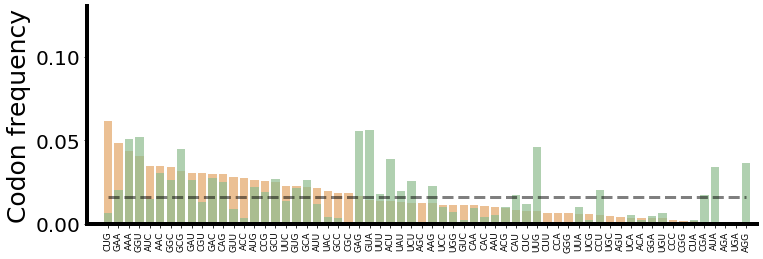

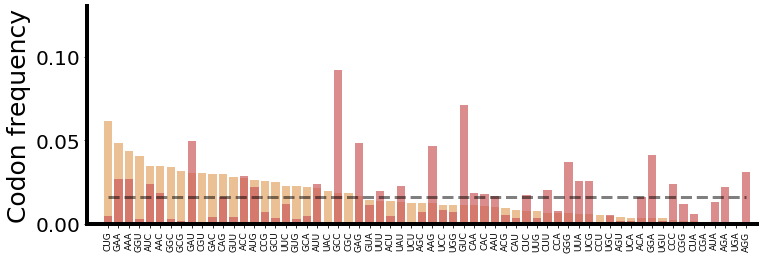

In [6]:
import matplotlib.pyplot as plt
import numpy as np

####Plot GA trajectory for both fast and slow
fullelongt = np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_fastCodonUsage_fullelongt.npy')
fig,ax = plt.subplots(figsize=(7,6))
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='darkseagreen')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='black',linestyle='dashed')
ax.set_xlim(-20,len(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

fullelongt = np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_slowCodonUsage_fullelongt.npy')
ax.plot(np.arange(len(fullelongt)),fullelongt,linewidth=4,color='indianred')
ax.plot(np.arange(len(fullelongt)),[186.4]*len(fullelongt),linewidth=3,color='green',linestyle='dashed')
print(max(fullelongt))
ax.scatter([0],fullelongt[0],color='black',zorder=10)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_ylabel('Elongation latency',fontsize=30)
ax.set_xlabel('Epoch',fontsize=30)
ax.set_ylim(170,250)
ax.set_yticks(np.arange(170,250,10))


####Plot final populations for fast and slow
fig,ax = plt.subplots(figsize=(10,6))

elongt_list_fast=np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_fastCodonUsage_elongt.npy')
pCodon_list_fast=np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_fastCodonUsage_pCodon.npy')
hist=ax.hist(elongt_list_fast,15,range=(164,194),color='darkseagreen',density=True)

elongt_list_slow=np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_slowCodonUsage_elongt.npy')
pCodon_list_slow=np.load('./data/WTtRNA_UniformRandomCodonUsage_2ksample_slowCodonUsage_pCodon.npy')
histslow=ax.hist(elongt_list_slow,15,range=(190,220),color='indianred',density=True)

elongt_list = np.load('./data/WTtRNA_UniformRandomCodonUsage_100sample_elongt.npy')
hist=ax.hist(elongt_list,15,range = (195,225),color='#d8832b',density=True,alpha=0.3)

#Compute elongation latency for uniform codon with WT tRNA
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))

#List of synonymous codons based on codon label order
syn_codon_list = [[0,1,2,3],[4,5],[6,7],[8,9,10,11],[12,13,14,15],[16,17,46,47,48,49],[18,19,42,43,44,45],
              [20,21],[22,23],[24],[25,26,27],[28,29,30,31],[32],[33],[34,35],[36,37],[38,39,54,55,56,57],[40,41],
              [50,51],[52,53],[58,59,60,61]]

for syn_codons in syn_codon_list:
    pCodon_uniform[syn_codons] = sum(gr25_pCodon[syn_codons])/sum(pCodon_uniform[syn_codons])*pCodon_uniform[syn_codons]
pCodon_uniform = pCodon_uniform/np.sum(pCodon_uniform)

elongt_WTtRNA_uniformcodon, std = computeElongationLatency(gr25_ptRNA,pCodon_uniform,ensmbl_latency_dict)
elongt_WTtRNA_WTcodon, std = computeElongationLatency(gr25_ptRNA,gr25_pCodon,ensmbl_latency_dict)


ax.plot([elongt_WTtRNA_uniformcodon]*100,np.linspace(0,max(histslow[0]),100),linewidth=3,color='black',alpha=0.5,linestyle='dashed')
ax.plot([elongt_WTtRNA_WTcodon]*100,np.linspace(0,max(histslow[0]),100),linewidth=3,color='green',linestyle='dashed')


for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.set_ylabel('Probability density',fontsize=30)
    ax.set_xlabel('Elongation latency',fontsize=30)
    ax.set_xlim(170,255)
    ax.set_xticks(np.arange(160,260,10))
    ax.set_ylim(0,0.455)
    
    
### Plot Codon distributions#######
#Wildtype
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

##Compute the codon distribution and elongation latency of each gene weighted by transcript number
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)

#Compute cognate distributions and sort codons by frequency
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Plot codon frequency sorted by decreasing frequency & pCodon max & min
fig,ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(62),pCodon_sorted,color='#d8832b',width=0.8,alpha=0.5)
ax.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
pCodon_min = pCodon_list_fast[np.argmax(elongt_list_fast)]
pCodon_min_dict = dict(zip(codon_tags,pCodon_min))
pCodon_min_sorted=[pCodon_min_dict[codon] for codon in codon_sorted]
ax.bar(np.arange(62),pCodon_min_sorted,color='darkseagreen',width=0.8,alpha=0.7)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')

fig,ax1 = plt.subplots(figsize=(12,4))
ax1.bar(np.arange(62),pCodon_sorted,color='#d8832b',width=0.8,alpha=0.5)
ax1.plot(np.arange(62),[1/62]*62,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
pCodon_max = pCodon_list_slow[np.argmax(elongt_list_slow)]
pCodon_max_dict = dict(zip(codon_tags,pCodon_max))
pCodon_max_sorted=[pCodon_max_dict[codon] for codon in codon_sorted]
ax1.bar(np.arange(62),pCodon_max_sorted,color='indianred',width=0.8,alpha=0.7)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')

for ax in [ax,ax1]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.set_xlim(-2,62)
    ax.set_ylabel('Codon frequency',fontsize=25)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylim(0,0.13)